In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
# training_datagen = ImageDataGenerator( rescale = 1.0/255.,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2)
training_datagen = ImageDataGenerator(rescale = 1.0/255., zoom_range = 0.2)
validation_datagen  = ImageDataGenerator( rescale = 1.0/255.)
TRAINING_DIR = '/Users/anranxu/Desktop/ML/training'
VALIDATION_DIR = '/Users/anranxu/Desktop/ML/validation'
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size =(504,504),
    color_mode ='grayscale',
    class_mode ='categorical',
    batch_size = 32,
    save_to_dir = '/Users/anranxu/Desktop/augmented_data',
    save_format = 'jpg'
)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(504,504),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size= 32
)

Found 840 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(504,504,1)),
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.AveragePooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [5]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=125, steps_per_epoch=840//32, validation_data = validation_generator, verbose = 1, validation_steps=200//32)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 502, 502, 16)      160       
_________________________________________________________________
average_pooling2d (AveragePo (None, 251, 251, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 249, 249, 32)      4640      
_________________________________________________________________
average_pooling2d_1 (Average (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0

26/26 [==============================] - 119s 5s/step - loss: 0.5064 - accuracy: 0.7822 - val_loss: 0.1897 - val_accuracy: 0.9740
Epoch 105/125
26/26 [==============================] - 120s 5s/step - loss: 0.4123 - accuracy: 0.8304 - val_loss: 0.6610 - val_accuracy: 0.6823
Epoch 106/125
26/26 [==============================] - 128s 5s/step - loss: 0.4216 - accuracy: 0.8245 - val_loss: 0.1701 - val_accuracy: 0.9844
Epoch 107/125
26/26 [==============================] - 130s 5s/step - loss: 0.4658 - accuracy: 0.7921 - val_loss: 0.6564 - val_accuracy: 0.6094
Epoch 108/125
26/26 [==============================] - 124s 5s/step - loss: 0.3905 - accuracy: 0.8564 - val_loss: 0.1921 - val_accuracy: 0.9792
Epoch 109/125
26/26 [==============================] - 110s 4s/step - loss: 0.3616 - accuracy: 0.8812 - val_loss: 0.7881 - val_accuracy: 0.5938
Epoch 110/125
26/26 [==============================] - 124s 5s/step - loss: 0.5006 - accuracy: 0.8181 - val_loss: 0.2082 - val_accuracy: 0.9740
Epoch 

In [6]:
model.save('/Users/anranxu/Desktop/3_layers_averagepooling_125_epochs.h5')

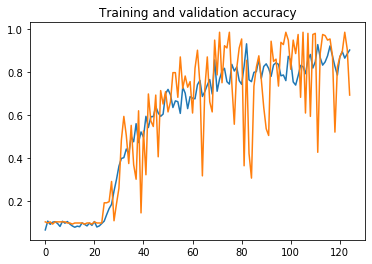

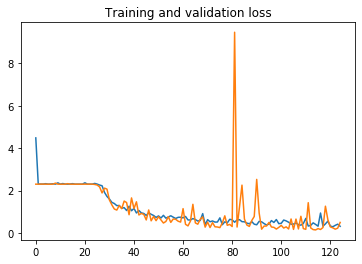

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()


# plt.show()
plt.figure()
plt.plot( epochs,     acc )
plt.plot( epochs, val_acc )
plt.title('Training and validation accuracy')
plt.savefig('/Users/anranxu/Desktop/Training and validation accuracy(2).jpg')
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss' )
plt.savefig('/Users/anranxu/Desktop/Training and validation loss(2).jpg')

In [9]:
img = load_img('/Users/anranxu/Desktop/ML/training/0.3/0.3(1)_(91,96).jpg', color_mode="grayscale")
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array/255, 0)
classes = model.predict_classes(img_array)
print(classes)

[2]


In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
loaded_model = load_model('/Users/anranxu/Desktop/3_layers_averagepooling_125_epochs.h5')
img = load_img('/Users/anranxu/Desktop/ML/training/0.3/0.3(1)_(91,96).jpg', color_mode="grayscale")
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array/255, 0)
classes = loaded_model.predict_classes(img_array)
print(classes)

[2]


In [4]:
import tensorflow as tf
ACCURACY_THRESHOLD = 0.97

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()


In [17]:
model.summary()
# optimizer = tf.keras.optimizers.SGD(lr=8e-4, momentum=0.6)

model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=200, steps_per_epoch=840//32, validation_data = validation_generator, verbose = 1, validation_steps=200//32, callbacks =[callbacks])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 502, 502, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 251, 251, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 249, 249, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 238144)           

KeyboardInterrupt: 